# U-Net nose live

We want to see the output of our model on live images from a camera.

In [1]:
from PIL import Image
import torch
from torch.utils.data import DataLoader, Dataset
import numpy as np
import matplotlib.pyplot as plt
import os
from  torchvision.transforms import ToTensor,Resize, Normalize
from tqdm import tqdm
from torch import optim
import albumentations as A

import ipywidgets as widgets
import threading
from ipywidgets import Label, HTML, HBox, Image, VBox, Box, HBox
from ipyevents import Event 
from IPython.display import display


from unetTracker.trackingProject import TrackingProject
from unetTracker.dataset import UNetDataset
from unetTracker.unet import Unet
from unetTracker.camera import USBCamera, bgr8_to_jpeg
from unetTracker.unetGUI import LabelFromCameraGUI

In [2]:
project = TrackingProject(name="faceTrack",root_folder = "/home/kevin/Documents/trackingProjects/")
dataset = UNetDataset(image_dir=project.image_dir, mask_dir=project.mask_dir, coordinate_dir=project.coordinate_dir)

Project directory: /home/kevin/Documents/trackingProjects/faceTrack
Loading /home/kevin/Documents/trackingProjects/faceTrack/config.yalm
{'augmentation_HorizontalFlipProb': 0.0, 'augmentation_RandomBrightnessContrastProb': 0.2, 'augmentation_RandomSizedCropProb': 1.0, 'augmentation_RotateProb': 0.3, 'image_size': [480, 640], 'labeling_ImageEnlargeFactor': 2.0, 'name': 'faceTrack', 'normalization_values': {'means': [0.5110162496566772, 0.4608974754810333, 0.4772901237010956], 'stds': [0.2727729380130768, 0.2578601539134979, 0.256255567073822]}, 'object_colors': [(0.0, 0.0, 255.0), (255.0, 0.0, 0.0), (255.0, 255.0, 0.0), (128.0, 0.0, 128.0)], 'objects': ['nose', 'chin', 'rEye', 'lEye'], 'target_radius': 10}


In [3]:
len(dataset)

611

In [4]:
device = (torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu"))
print("Training on device {}".format(device))

Training on device cuda


## Model

In [5]:
model = Unet(in_channels=3,out_channels=len(project.object_list)).to(device)
fn=project.model_fn
model.load_state_dict(torch.load(fn,map_location=device))

<All keys matched successfully>

Get the camera

In [6]:
camera = USBCamera(width=640, height=480)

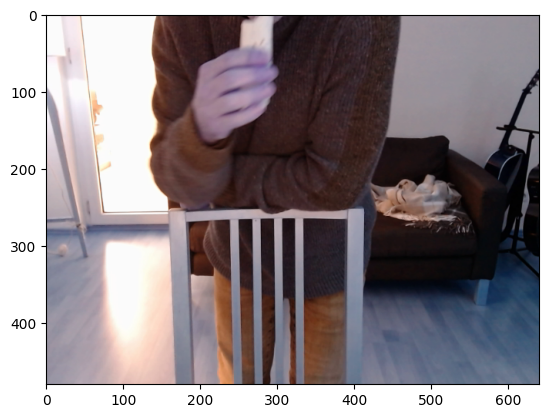

In [7]:
image = camera.read()
plt.imshow(image)

In [8]:
gui = LabelFromCameraGUI(camera,project,dataset,model,device)

In [9]:
len(dataset)

611

In [10]:
dataset.create_training_validation_dataset(train_image_dir = "/home/kevin/Documents/trackingProjects/faceTrack/dataset/train_images",
                                           train_mask_dir = "/home/kevin/Documents/trackingProjects/faceTrack/dataset/train_masks",
                                           train_coordinate_dir = "/home/kevin/Documents/trackingProjects/faceTrack/dataset/train_coordinates",
                                               
                                           val_image_dir = "/home/kevin/Documents/trackingProjects/faceTrack/dataset/val_images",
                                           val_mask_dir = "/home/kevin/Documents/trackingProjects/faceTrack/dataset/val_masks",
                                           val_coordinate_dir = "/home/kevin/Documents/trackingProjects/faceTrack/dataset/val_coordinates",
                                           test_ratio=0.15)

Number of item in dataset: 611
Length of training set: 519
Length of validation set: 92
Actual test ratio: 0.151
Copying files to training and validation directories
